In [15]:
!pip install -U kaleido

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mdates
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "png"

plt.rcParams['figure.figsize'] = [10, 5]

df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [17]:
# Nettoyage rapide

print("📌 Types de données :")
display(df.dtypes)

print("\n❓ Valeurs manquantes :")
display(df.isna().sum().sort_values(ascending=False))

duplicates = df.duplicated().sum()
print(f"\n🧼 Lignes dupliquées détectées : {duplicates}")
df = df.drop_duplicates()

if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

print("Résumé statistique :")
display(df.describe(include='all'))

📌 Types de données :


,0
index,int64
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Style,object
SKU,object
Category,object



❓ Valeurs manquantes :


,0
fulfilled-by,89698
promotion-ids,49153
Unnamed: 22,49050
currency,7795
Amount,7795
Courier Status,6872
ship-country,33
ship-city,33
ship-state,33
ship-postal-code,33



🧼 Lignes dupliquées détectées : 0


<ipython-input-17-2167537325>:14: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Résumé statistique :


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128975.000000,128975,128975,128975,128975,128975,128975,128975,128975,128975,...,121180,121180.000000,128942,128942,128942.000000,128942,79822,128975,39277,79925
unique,NaN,120378,NaN,13,2,2,2,1377,7195,9,...,1,NaN,8955,69,NaN,1,5787,2,1,1
top,NaN,403-4984515-8861958,NaN,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,...,INR,NaN,BENGALURU,MAHARASHTRA,NaN,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,NaN,12,NaN,77804,89698,128851,88615,4224,773,50284,...,121180,NaN,11217,22260,NaN,128942,46100,128104,39277,79925
mean,64487.000000,NaN,2022-05-12 11:49:27.951928576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,648.561465,NaN,NaN,463966.236509,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,110001.000000,NaN,NaN,NaN,NaN,NaN
25%,32243.500000,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,449.000000,NaN,NaN,382421.000000,NaN,NaN,NaN,NaN,NaN
50%,64487.000000,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,605.000000,NaN,NaN,500033.000000,NaN,NaN,NaN,NaN,NaN
75%,96730.500000,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,788.000000,NaN,NaN,600024.000000,NaN,NaN,NaN,NaN,NaN
max,128974.000000,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5584.000000,NaN,NaN,989898.000000,NaN,NaN,NaN,NaN,NaN


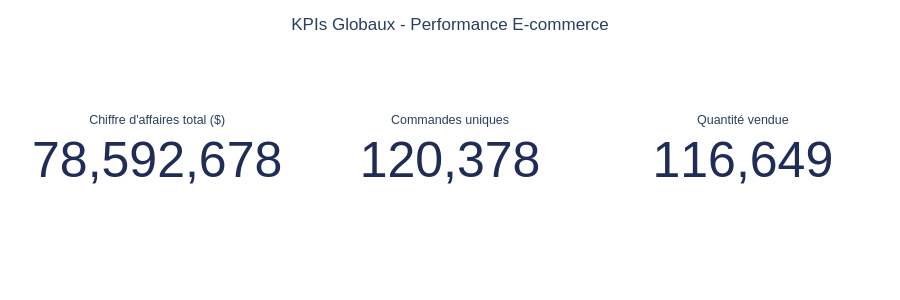

In [18]:
# Calcul des 3 KPIs principaux et visualisation
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()
total_qty = df['Qty'].sum()

fig = go.Figure()
{}

number_font = {'size' : 50, 'color': '#1f2c56'}

fig.add_trace(go.Indicator(
    mode="number",
    value=total_sales,
    title={"text": "Chiffre d'affaires total ($)"},
    number={'valueformat': ',.0f', 'font' : number_font},
    domain={'row': 0, 'column': 0}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=total_orders,
    title={"text": "Commandes uniques"},
    number={'valueformat': ',.0f', 'font' : number_font},
    domain={'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=total_qty,
    title={"text": "Quantité vendue"},
    number={'valueformat': ',.0f', 'font' : number_font},
    domain={'row': 0, 'column': 2}
))

fig.update_layout(
    grid={'rows': 1, 'columns': 3, 'pattern': "independent"},
    template='plotly_white',
    title_text="KPIs Globaux - Performance E-commerce",
    title_x=0.5
)

fig.update_layout(
    width=900,
    height=300,
    margin=dict(l=40, r=40, t=60, b=40),
    grid=dict(rows=1, columns=3, pattern="independent"),
)

fig.show()

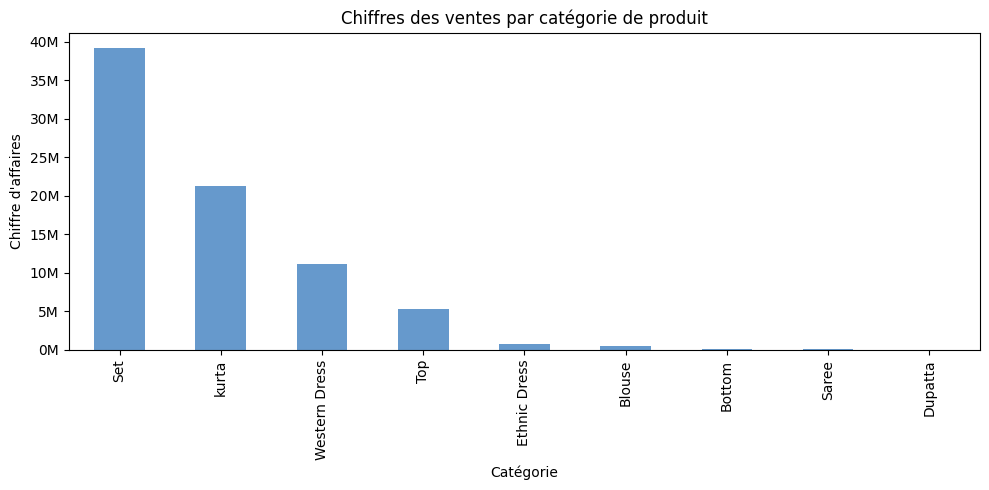

In [19]:
# Calcul des chiffres des ventes par catégorie de produit

df.columns = df.columns.str.strip()

sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', color='#6699CC')

plt.title("Chiffres des ventes par catégorie de produit")
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d'affaires")

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

plt.tight_layout()
plt.show()

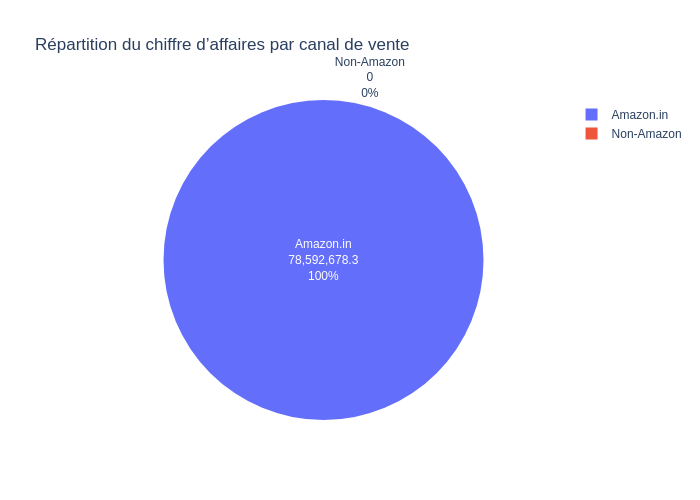

In [20]:
# Répartition des ventes par canal

sales_by_channel = df.groupby('Sales Channel')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

fig = px.pie(
    sales_by_channel,
    names='Sales Channel',
    values='Amount',
    title='Répartition du chiffre d’affaires par canal de vente',
    hole=0
)

fig.update_traces(textinfo='label+percent+value')  # labels + % + valeur

fig.show()

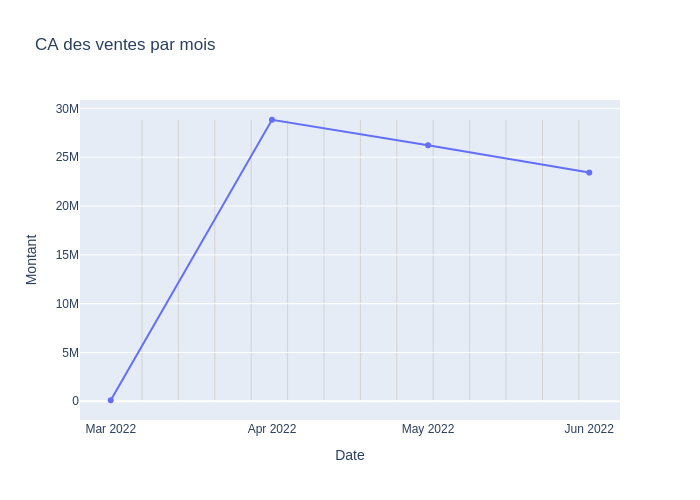

In [21]:
# Évolution du CA par mois

df['Date'] = pd.to_datetime(df['Date'])


df['MonthStart'] = df['Date'].dt.to_period('M').dt.to_timestamp()

monthly_sales = df.groupby('MonthStart')['Amount'].sum().reset_index()

fig = px.line(
    monthly_sales,
    x='MonthStart',
    y='Amount',
    title='CA des ventes par mois',
    labels={'MonthStart': 'Date', 'Amount': 'Montant'},
    markers=True
)

# Ajout de traits hebdomadaires

weekly_dates = pd.date_range(start=monthly_sales['MonthStart'].min(),
                             end=monthly_sales['MonthStart'].max(),
                             freq='W-MON')  # tous les lundis

for date in weekly_dates:
    fig.add_shape(
        type="line",
        x0=date, x1=date,
        y0=0, y1=monthly_sales['Amount'].max(),
        line=dict(color="lightgrey", width=1),
        layer='below'
    )

# Affichage mensuel uniquement en labels
fig.update_xaxes(
    dtick="M1",
    tickformat="%b %Y",
    showgrid=False
)

fig.show()

# 🟦 Conclusion
	•	L’analyse de ce dataset e-commerce a permis de visualiser l’évolution mensuelle du chiffre d’affaires ainsi que la répartition des ventes par catégorie et par canal de distribution.
	•	Le chiffre d’affaires global s’élève à près de 78M $ pour un total de plus de 120 000 commandes.
	•	Les canaux de vente sont inégalement performants, et certaines catégories de produits génèrent des volumes nettement supérieurs.
	•	On observe également une hausse régulière des ventes sur la période étudiée (si vrai dans ton graphique).

⸻

### Pistes potentielles d’analyse plus poussée
	•	Croiser les données de ventes avec les données clients ou géographiques (si disponibles)
	•	Étudier la performance des promotions (promotion-ids)
	•	Intégrer un suivi avant/après campagne marketing ou analyser les produits les plus rentables